In [45]:
from osgeo import gdal
import rasterio
import numpy as np

In [46]:
import matplotlib.pyplot as plt

In [47]:
#input the file
filename = r"C:\Users\RAMBABU\Geopandas\ICRISAT_SUBSET_AVIRIS_recta.tiff"

In [48]:

dataset = rasterio.open(filename)
print (dataset)
Crs = dataset.crs
trans = dataset.transform
cols = dataset.width
rows = dataset.height
bands= dataset.count
print(cols,rows,bands)

<open DatasetReader name='C:/Users/RAMBABU/Geopandas/ICRISAT_SUBSET_AVIRIS_recta.tiff' mode='r'>
432 809 372


In [49]:
with rasterio.open(filename) as r:
    raster_matrix_image= r.read()

In [50]:
nir = raster_matrix_image[75,:,:]
red = raster_matrix_image[55,:,:]

In [58]:
#SAVI
dinom = nir+red+0.5
numer = (nir-red)*1.5
np.seterr(divide='ignore', invalid='ignore') 
ICRISAT_SAVI = np.where(dinom==0.0, 0.0, numer/dinom)

In [59]:
ICRISAT_SAVI = np.where(dinom==0.0, 0.0, numer/dinom)

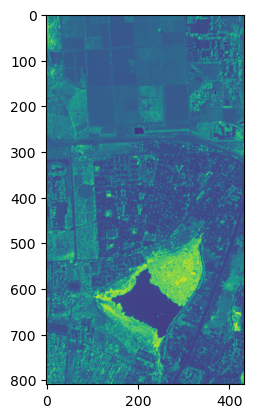

In [60]:
plt.figure()
plt.imshow(ICRISAT_SAVI)

In [61]:
out_meta = dataset.meta.copy()

out_meta.update({'driver':'GTiff',
                 'width':dataset.shape[1],
                 'height':dataset.shape[0],
                 'count':1,
                 'dtype':'float64',
                 'crs':dataset.crs, 
                 'transform':dataset.transform,
                 'nodata':0})

In [62]:
#now how to save the ndvi data apply the above parameters
with rasterio.open(fp=r'ICRISAT_SAVI.tiff', # outputpath_name
             mode='w',**out_meta) as dst:
             dst.write_band(1,ICRISAT_SAVI) # the numer one is the number of bands

In [18]:
SAVI

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
np.amin(nir.flatten())

0

In [34]:
red

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [19]:
out_meta = dataset.meta.copy()

out_meta.update({'driver':'GTiff',
                 'width':dataset.shape[1],
                 'height':dataset.shape[0],
                 'count':1,
                 'dtype':'float64',
                 'crs':dataset.crs, 
                 'transform':dataset.transform,
                 'nodata':0})

In [20]:

with rasterio.open(fp=r'SAVI.tiff', #outputpath_name
             mode='w',**out_meta) as dst:
             dst.write(savi, 1) # the numer one is the number of bands

with rasterio.open(fp=r'SAVI.tif', # outputpath_name
             mode='w',**out_meta) as dst:
             dst.write_band(1,SAVI) # the numer one is the number of bands

In [26]:
NDVI_1 = rasterio.open('C:/Users/RAMBABU/Geopandas/ndvi1.tif')

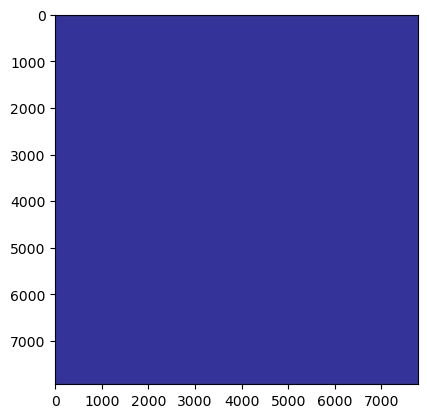

In [27]:
pyplot.imshow(NDVI_1.read(1), cmap='terrain')
pyplot.show()

In [44]:
import fiona
import rasterio
import rasterio.mask

with fiona.open("sub.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]
    

In [49]:
with rasterio.open("T44QRF_20220427T044649_B03_20m.jp2") as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta

In [50]:
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open("dataset.byte.masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)